Import libraries

In [1]:
import diplib

import cv2
import numpy as np
from IPython.display import Video
from matplotlib import pyplot as plt

# Driveway1

Set source path

In [2]:
src = './homework2/driveway1.mp4'
dest = './homework2/driveway1-detected.mp4'
frames = diplib.get_video_frames(src)

Make segmented video for testing

In [3]:
seg_frames = frames # [:500]

Get background image of video from video's median image

In [4]:
# Get median image
median = np.median(seg_frames, axis=0)

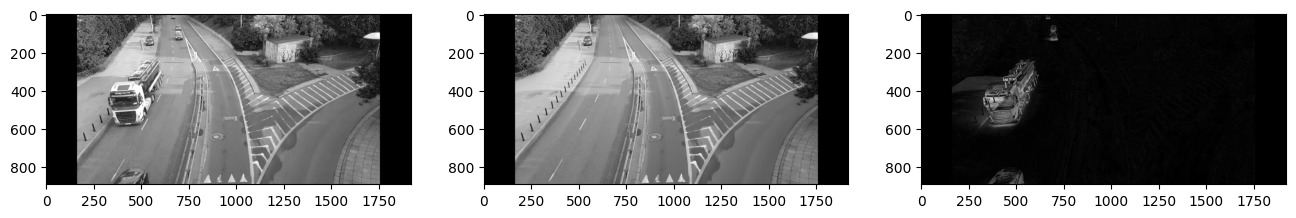

In [5]:
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(seg_frames[30,:,:,0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(median[:,:,0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(cv2.absdiff(seg_frames[30,:,:,0], median[:,:,0].astype('uint8')), cmap='gray')
plt.show()

Make foreground video from video and background image

In [6]:
foreground_frames = np.empty_like(seg_frames)
for idx, frame in enumerate(seg_frames):
    foreground_frames[idx] = cv2.absdiff(frame, median.astype('uint8'))

Apply operations to detect objects
  1. Thresholding with intensity
  2. Remaining only intensity
  3. Closing (Eroison after dilation)

In [7]:
hsv_frames = diplib.frames_rgb_to_hsv(foreground_frames)

hsv_frames[:,:,:,0] = 0
hsv_frames[:,:,:,1] = 0
hsv_frames[:,:,:,2] = diplib.thresholding(hsv_frames[:,:,:,2], 85, 255)
kernel = lambda x: np.ones((x, x))
for idx, frame in enumerate(hsv_frames[:,:,:,2]):
    hsv_frames[idx,:,:,2] = cv2.dilate(frame, kernel(9))
    hsv_frames[idx,:,:,2] = cv2.erode(frame, kernel(5))

hsv_frames = diplib.frames_hsv_to_rgb(hsv_frames)
result_frames = diplib.connect_components(hsv_frames, seg_frames.copy(), 300)

diplib.export_video(dest, result_frames)
Video(dest)

# Driveway2

Set source path

In [8]:
src = './homework2/driveway2.mp4'
dest = './homework2/driveway2-detected.mp4'
frames = diplib.get_video_frames(src)

Make segmented video for testing

In [9]:
seg_frames = frames[:500]

Get background image of video from video's median image

In [10]:
# Get median image
median = np.median(seg_frames, axis=0)

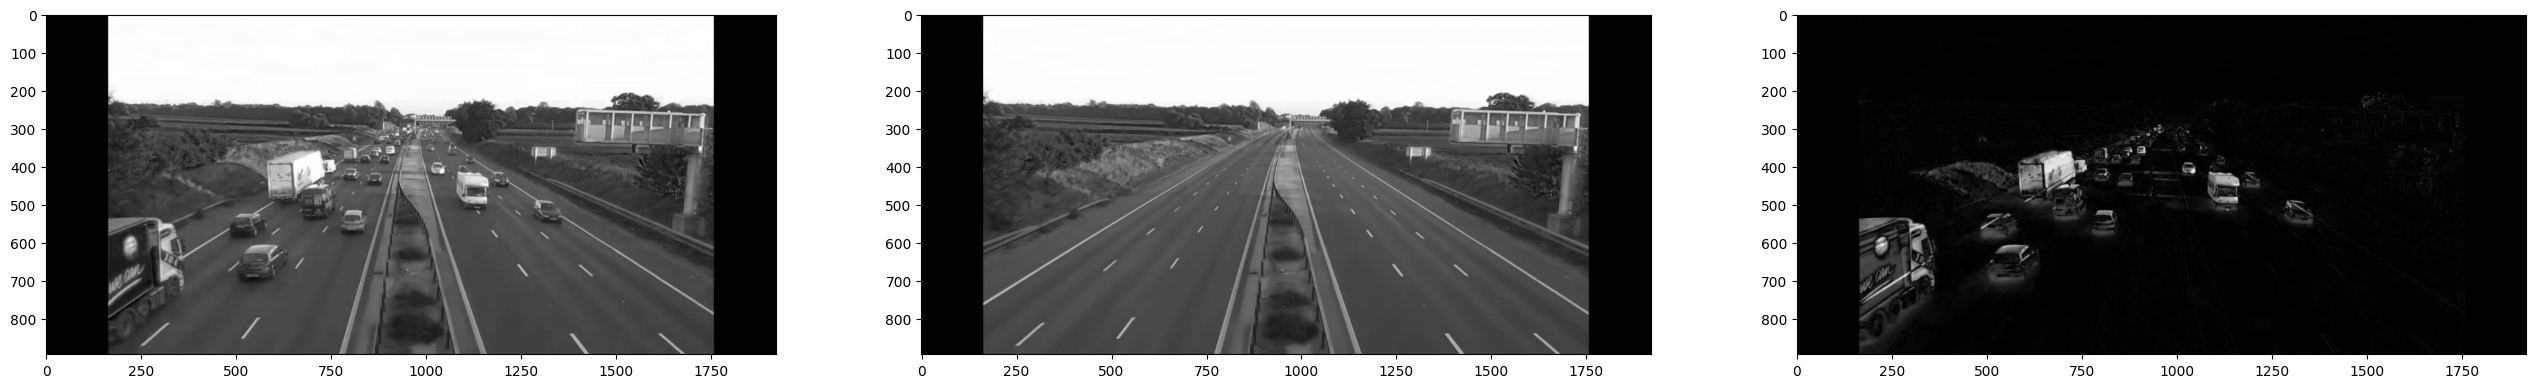

In [11]:
plt.figure(figsize=(32,8))
plt.subplot(1, 3, 1)
plt.imshow(seg_frames[30,:,:,0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(median[:,:,0], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(cv2.absdiff(seg_frames[30,:,:,0], median[:,:,0].astype('uint8')), cmap='gray')
plt.show()

Make foreground video from video and background image

In [12]:
foreground_frames = np.empty_like(seg_frames)
for idx, frame in enumerate(seg_frames):
    foreground_frames[idx] = cv2.subtract(frame, median.astype('uint8'))

Apply operations to detect objects
  1. Thresholding with intensity
  2. Remaining only intensity
  3. Closing (Eroison after dilation)

In [13]:
hsv_frames = diplib.frames_rgb_to_hsv(foreground_frames)

hsv_frames[:,:,:,0] = 0
hsv_frames[:,:,:,1] = 0
hsv_frames[:,:,:,2] = diplib.thresholding(hsv_frames[:,:,:,2], 30, 255)
kernel = lambda x: np.ones((x, x))
for idx, frame in enumerate(hsv_frames[:,:,:,2]):
    hsv_frames[idx,:,:,2] = cv2.erode(frame, kernel(5))
    hsv_frames[idx,:,:,2] = cv2.dilate(frame, kernel(17))

hsv_frames = diplib.frames_hsv_to_rgb(hsv_frames)
result_frames = diplib.connect_components(hsv_frames, seg_frames.copy(), 300)

diplib.export_video(dest, result_frames)
Video(dest)